In [1]:
%pip install ipympl


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.6 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.0/245.0 kB 8.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.0 MB/s 

In [4]:
%pip install mpmath sympy numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Note: you may need to restart the kernel to use updated packages.


xlim: (-10.092071598136792, 9.030608792832272) | ylim: (-16.081419297216232, 8.211738710646076) | zlim: (-299.0, 301.0)


interactive(children=(IntSlider(value=45, description='s', max=90), Output()), _dom_classes=('widget-interact'…

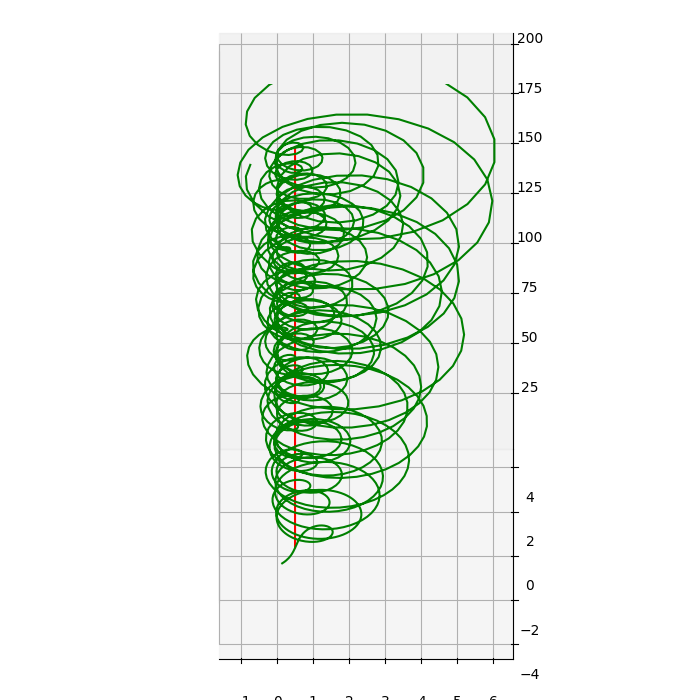

In [1]:
%matplotlib widget
from mpmath import zeta, linspace, j
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact

# Define the Riemann zeta function
def f(t):
    return zeta(0.5 + t*j)

# Define the limits of the plot
def lim(min, max):
    s = int(abs(max-min))//2
    rmin = (min-s)+2*-s
    rmax = (max-s)+2*s
    return (rmin, rmax)

def apect_ratio(xlim, ylim, zlim):
    dims = np.array([xlim[1]-xlim[0], ylim[1]-ylim[0], zlim[1]-zlim[0]])
    #normalize the dims array and add 1 to each element
    dims = dims - dims.min()
    dims = dims / dims.max()
    dims = dims + 1

    return dims

def riemman_zeta(s: int, c: int=100):
    #make space between integer values in the real axis
    #z(s)=1/1ˆs+1/2ˆs+1/3...
    r = np.linspace(1.0, 1.0+s, c, endpoint=True)
    #make space between integer values in the imaginary axis
    zz = np.linspace(1.0, 1.0+s, c, endpoint=True)

    #evaluate the function at each point in the r array
    z = np.array([f(rr) for rr in r])
    #parse the real and imaginary parts of the z array
    x = np.array([float(z[i].real) for i in range(len(z))])
    y = np.array([float(z[i].imag) for i in range(len(z))])

    #create a 3D meshgrid of the x and y arrays
    X, Y = np.meshgrid(x, y)
    Z = np.arctan2(X,Y)+zz

    return x, y, zz, X, Y, Z


# Define the number of discrete steps and continuous time steps
x, y, z, X, Y, Z = riemman_zeta(200,2000)
x0 = 1/2.0
critical_line = np.array([(x0,0.0,i) for i in z])

xlim = lim(x.min(), x.max())
ylim = lim(y.min(), y.max())
zlim = lim(z.min(), z.max())

# Create a 3D plot0][:].max())
print(f"xlim: {xlim} | ylim: {ylim} | zlim: {zlim}")

# Create a 3D plot
ax = plt.figure(figsize=(7,7), num=0, clear=True).add_subplot(projection='3d')
ax.set(xlim=xlim, ylim=ylim, zlim=zlim,
       xlabel='X', ylabel='Y', zlabel='Z')

@interact(s=(0,90,1))
def update(s):
    ax.clear()

    #plot critical line in red
    ax.plot(critical_line[:,0], critical_line[:,1], critical_line[:,2], color='r')
    ax.set_proj_type('ortho')

    ax.plot(x, y, z, label='parametric curve', color='g')
    # Set zoom and angle view
    ax.view_init(s, -90, 0)
    ax.axes.set_box_aspect(aspect=apect_ratio(xlim, ylim, zlim), zoom=1.3)


plt.show()

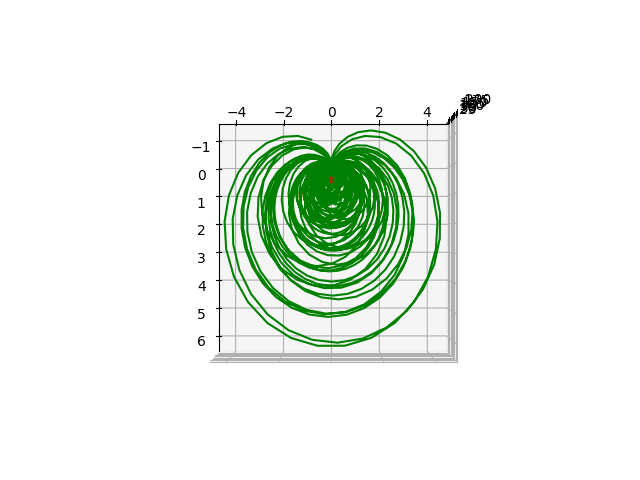

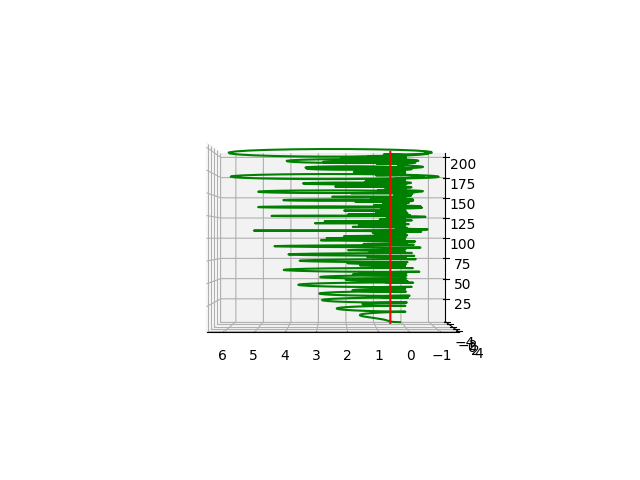

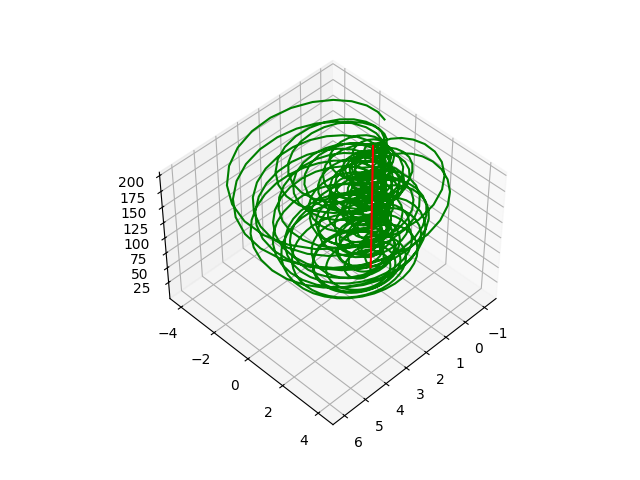

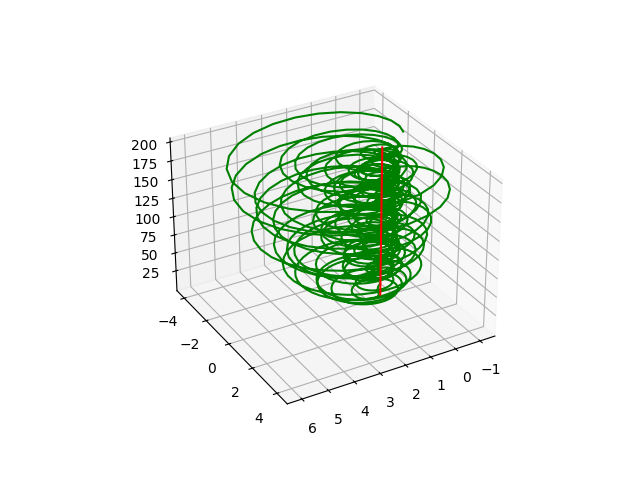

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rotate and plot the zeta function in 3D space
def plot_transformed_zeta(elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, label='parametric curve', color='g')
    ax.plot(critical_line[:,0], critical_line[:,1], critical_line[:,2], color='r')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Explore different transformations
plot_transformed_zeta(elev=90, azim=0)   # Top-down view
plot_transformed_zeta(elev=0, azim=90)   # Side view
plot_transformed_zeta(elev=45, azim=45)  # Diagonal view
plot_transformed_zeta(elev=30, azim=60)  # Arbitrary angle view


In [2]:
import numpy as np
from mpmath import zeta, linspace, j

# Generate data points
def generate_zeta_data(num_points):
    data = []
    t_values = np.linspace(0, 200, num_points)
    for t in t_values:
        zeta_value = zeta(0.5 + t * j)
        data.append([t, float(zeta_value.real), float(zeta_value.imag)])
    return np.array(data)

# Generate 10,000 data points
data = generate_zeta_data(10000)


In [3]:
# Features are the input values (t) and labels are the real and imaginary parts of the zeta function
X = data[:, 0].reshape(-1, 1)
y = data[:, 1:]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (real and imaginary parts)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [5]:
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 1.9970 - mae: 1.0507 - val_loss: 1.9088 - val_mae: 1.0486
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 1.3694 - mae: 0.8774 - val_loss: 1.9541 - val_mae: 1.0127
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 1.2789 - mae: 0.8452 - val_loss: 2.2883 - val_mae: 1.2203
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 1.2378 - mae: 0.8358 - val_loss: 2.1226 - val_mae: 1.1468
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 1.2686 - mae: 0.8406 - val_loss: 2.2114 - val_mae: 1.0080
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.2397 - mae: 0.8305 - val_loss: 1.8821 - val_mae: 1.0134
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 1.2332 - mae: 0.8339 - val_loss: 1.9816 - val_mae: 1.0440
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.2301 - mae: 0.8247 - val_loss: 1.8547 - val_mae: 0.9997
Epoch 9/100
250/250 ━━━━━━━━━━━━

In [6]:
# Generate test data
test_data = generate_zeta_data(2000)
X_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1:]

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.8205 - mae: 0.5928
Test Loss: 1.3120392560958862, Test MAE: 0.8155698776245117


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


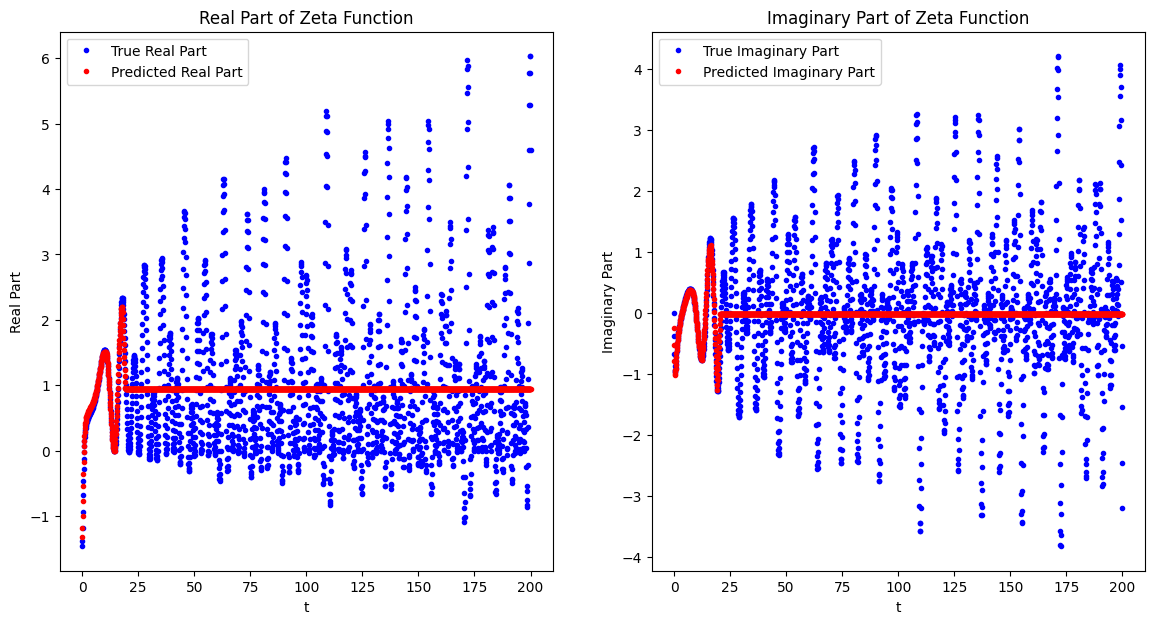

In [7]:
import matplotlib.pyplot as plt

# Predict values using the trained model
y_pred = model.predict(X_test)

# Plot the true vs predicted values
plt.figure(figsize=(14, 7))

# Plot real part
plt.subplot(1, 2, 1)
plt.plot(X_test, y_test[:, 0], 'b.', label='True Real Part')
plt.plot(X_test, y_pred[:, 0], 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part of Zeta Function')

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test[:, 1], 'b.', label='True Imaginary Part')
plt.plot(X_test, y_pred[:, 1], 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part of Zeta Function')

plt.show()


Epoch 1/100


/Users/rafaelaguilherdacosta/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0510 - mae: 0.1713 - val_loss: 0.0304 - val_mae: 0.1287
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0206 - mae: 0.1080 - val_loss: 0.0309 - val_mae: 0.1293
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.0203 - mae: 0.1080 - val_loss: 0.0306 - val_mae: 0.1246
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.0203 - mae: 0.1076 - val_loss: 0.0305 - val_mae: 0.1264
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 - mae: 0.1097 - val_loss: 0.0303 - val_mae: 0.1272
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0208 - mae: 0.1092 - val_loss: 0.0303 - val_mae: 0.1261
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0205 - mae: 0.1084 - val_loss: 0.0304 - val_mae: 0.1283
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0212 - mae: 0.1099 - val_loss: 0.0312 - val_mae: 0.1266
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/

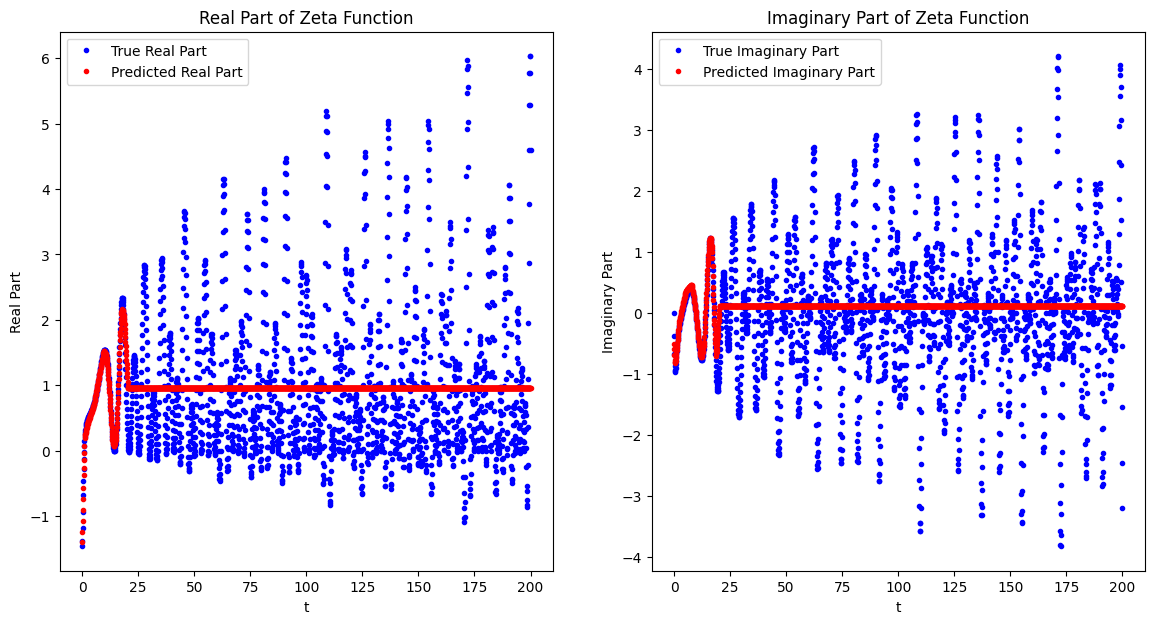

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Generate data points
def generate_zeta_data(num_points):
    data = []
    t_values = np.linspace(0, 200, num_points)
    for t in t_values:
        zeta_value = zeta(0.5 + t * j)
        data.append([t, float(zeta_value.real), float(zeta_value.imag)])
    return np.array(data)

# Generate 10,000 data points
data = generate_zeta_data(10000)

# Features and labels
X = data[:, 0].reshape(-1, 1)
y = data[:, 1:]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Reshape input for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_scaled.shape[1], X_scaled.shape[2]), activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2)  # Output layer with 2 neurons (real and imaginary parts)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2)

# Generate test data
test_data = generate_zeta_data(2000)
X_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1:]

# Normalize test data
X_test_scaled = scaler_X.transform(X_test)
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_test_scaled = scaler_y.transform(y_test)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Predict values using the trained model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Plot the true vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot real part
plt.subplot(1, 2, 1)
plt.plot(X_test, y_test[:, 0], 'b.', label='True Real Part')
plt.plot(X_test, y_pred[:, 0], 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part of Zeta Function')

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test[:, 1], 'b.', label='True Imaginary Part')
plt.plot(X_test, y_pred[:, 1], 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part of Zeta Function')

plt.show()


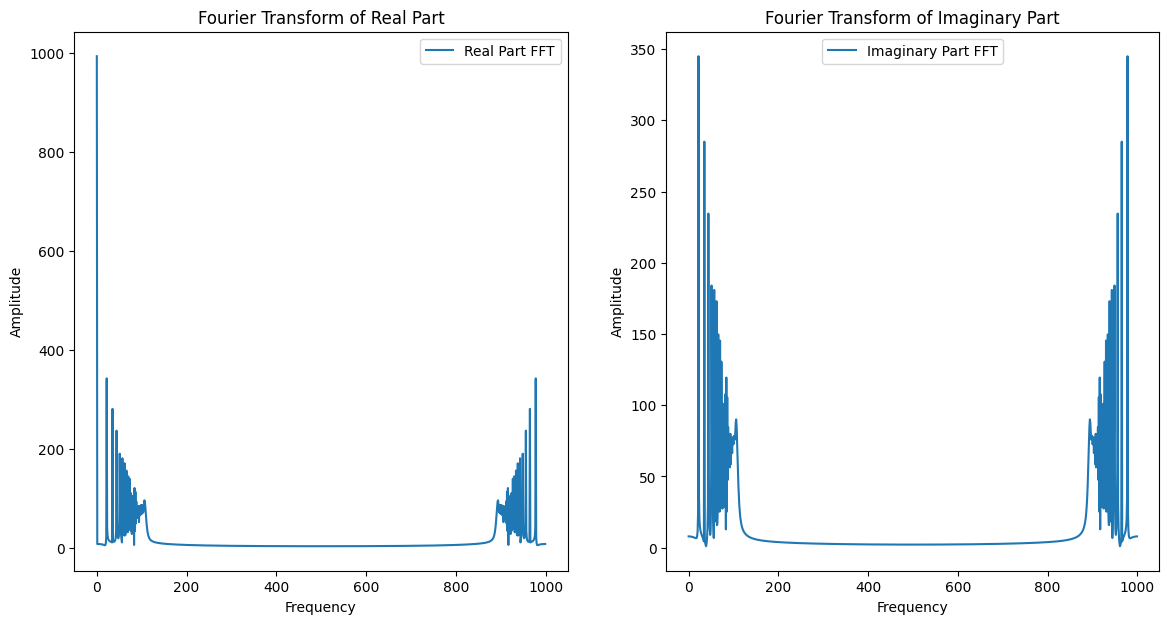

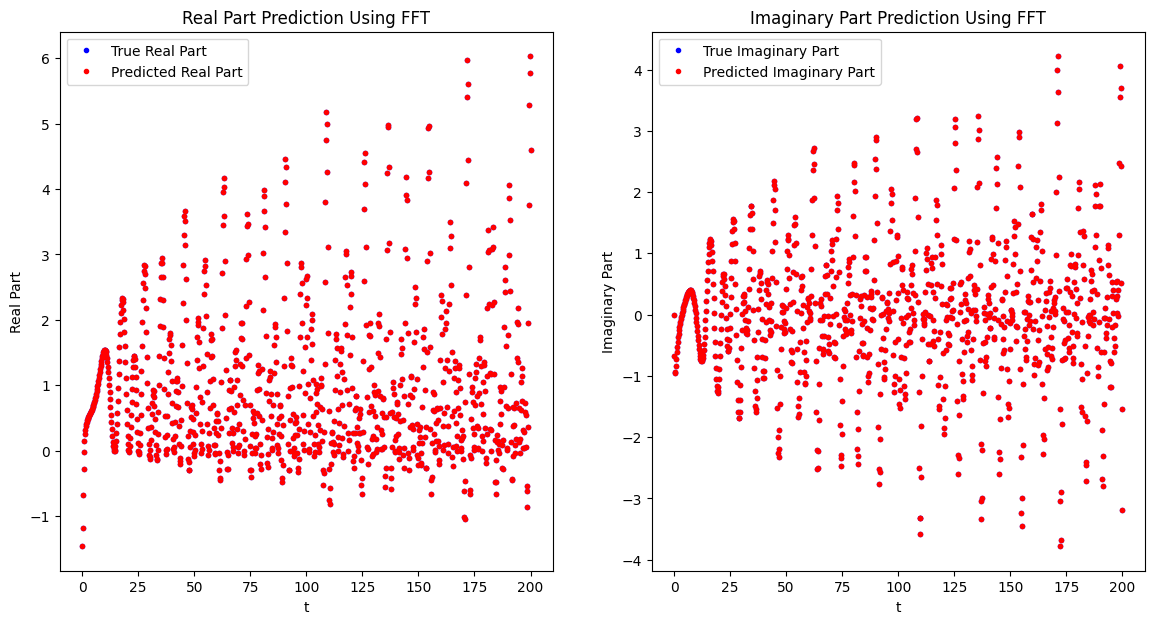

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zeta, j
from scipy.fft import fft, ifft

# Generate data points
def generate_zeta_data(num_points):
    t_values = np.linspace(0, 200, num_points)
    zeta_values = [zeta(0.5 + t * j) for t in t_values]
    real_parts = [float(z.real) for z in zeta_values]
    imag_parts = [float(z.imag) for z in zeta_values]
    return t_values, np.array(real_parts), np.array(imag_parts)

# Generate data
t_values, real_parts, imag_parts = generate_zeta_data(1000)

# Apply Fourier Transform
real_fft = fft(real_parts)
imag_fft = fft(imag_parts)

# Plot the FFT results
plt.figure(figsize=(14, 7))

# Plot real part FFT
plt.subplot(1, 2, 1)
plt.plot(np.abs(real_fft), label='Real Part FFT')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Real Part')

# Plot imaginary part FFT
plt.subplot(1, 2, 2)
plt.plot(np.abs(imag_fft), label='Imaginary Part FFT')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Imaginary Part')

plt.show()

# Predict future values (simple example using inverse FFT for illustration)
# In practice, you would modify the frequency components and then apply inverse FFT
real_pred = ifft(real_fft).real
imag_pred = ifft(imag_fft).real

# Plot predictions
plt.figure(figsize=(14, 7))

# Plot real part predictions
plt.subplot(1, 2, 1)
plt.plot(t_values, real_parts, 'b.', label='True Real Part')
plt.plot(t_values, real_pred, 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part Prediction Using FFT')

# Plot imaginary part predictions
plt.subplot(1, 2, 2)
plt.plot(t_values, imag_parts, 'b.', label='True Imaginary Part')
plt.plot(t_values, imag_pred, 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part Prediction Using FFT')

plt.show()


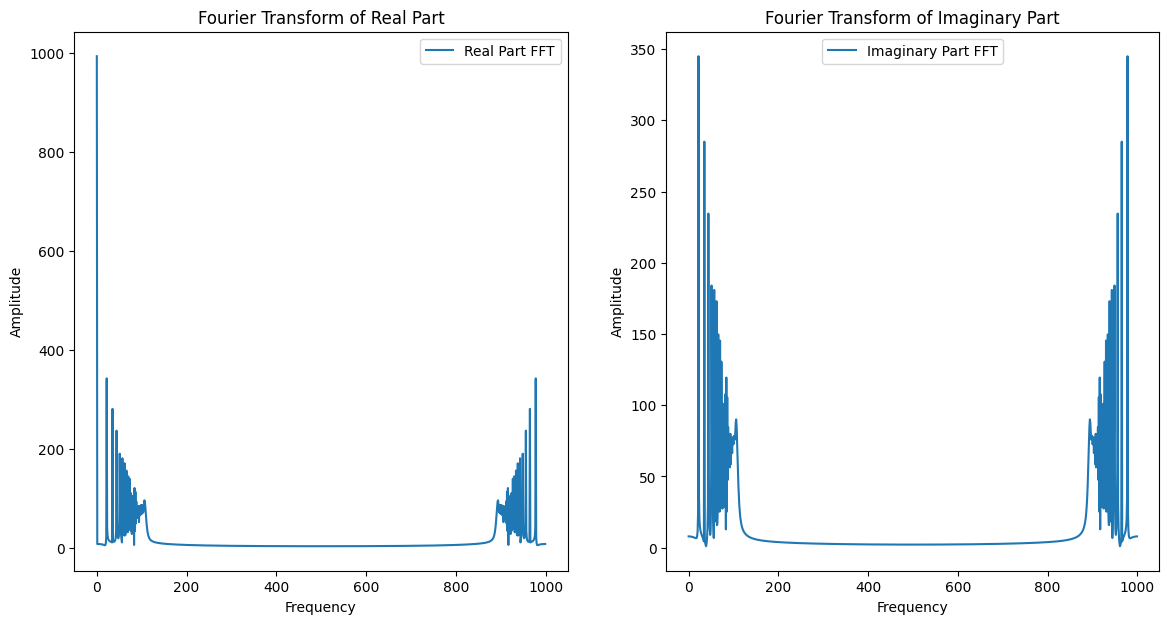

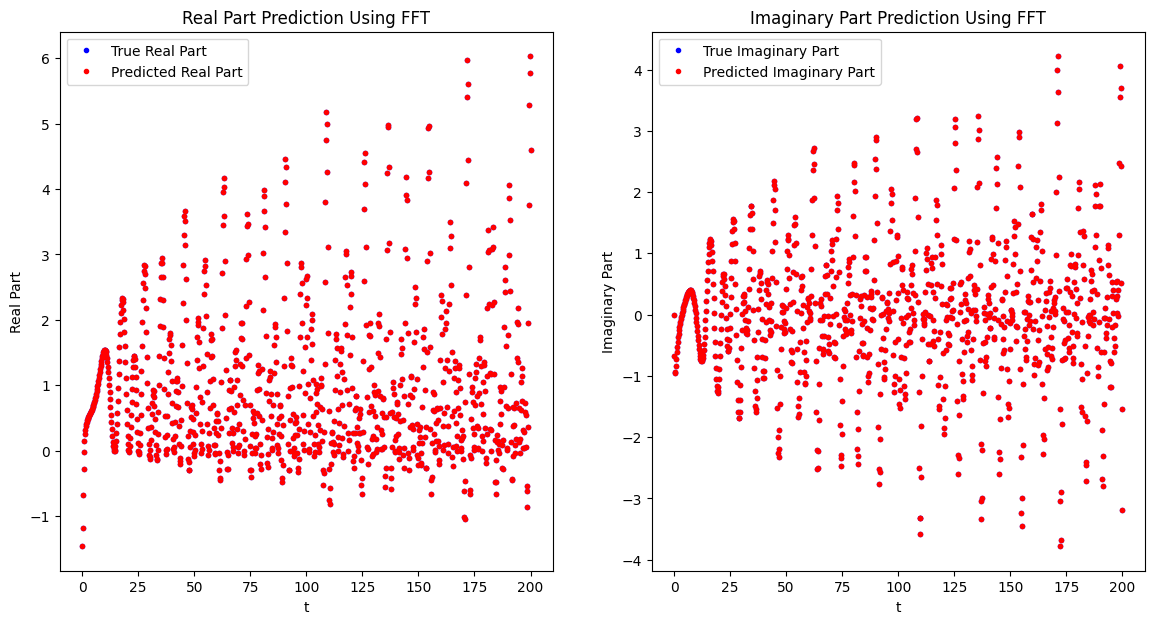

Real Part - MSE: 2.0650881030393475e-31, MAE: 3.48459786416247e-16
Imaginary Part - MSE: 1.674450280971593e-31, MAE: 3.0597412103983145e-16


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zeta, j
from scipy.fft import fft, ifft
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate data points
def generate_zeta_data(num_points):
    t_values = np.linspace(0, 200, num_points)
    zeta_values = [zeta(0.5 + t * j) for t in t_values]
    real_parts = [float(z.real) for z in zeta_values]
    imag_parts = [float(z.imag) for z in zeta_values]
    return t_values, np.array(real_parts), np.array(imag_parts)

# Generate data
t_values, real_parts, imag_parts = generate_zeta_data(1000)

# Apply Fourier Transform
real_fft = fft(real_parts)
imag_fft = fft(imag_parts)

# Predict future values (simple example using inverse FFT for illustration)
# In practice, you would modify the frequency components and then apply inverse FFT
real_pred = ifft(real_fft).real
imag_pred = ifft(imag_fft).real

# Plot the FFT results
plt.figure(figsize=(14, 7))

# Plot real part FFT
plt.subplot(1, 2, 1)
plt.plot(np.abs(real_fft), label='Real Part FFT')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Real Part')

# Plot imaginary part FFT
plt.subplot(1, 2, 2)
plt.plot(np.abs(imag_fft), label='Imaginary Part FFT')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Imaginary Part')

plt.show()

# Plot predictions
plt.figure(figsize=(14, 7))

# Plot real part predictions
plt.subplot(1, 2, 1)
plt.plot(t_values, real_parts, 'b.', label='True Real Part')
plt.plot(t_values, real_pred, 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part Prediction Using FFT')

# Plot imaginary part predictions
plt.subplot(1, 2, 2)
plt.plot(t_values, imag_parts, 'b.', label='True Imaginary Part')
plt.plot(t_values, imag_pred, 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part Prediction Using FFT')

plt.show()

# Calculate errors
true_real = real_parts
pred_real = real_pred
true_imag = imag_parts
pred_imag = imag_pred

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for real part
mse_real = mean_squared_error(true_real, pred_real)
mae_real = mean_absolute_error(true_real, pred_real)

# Calculate MSE and MAE for imaginary part
mse_imag = mean_squared_error(true_imag, pred_imag)
mae_imag = mean_absolute_error(true_imag, pred_imag)

print(f'Real Part - MSE: {mse_real}, MAE: {mae_real}')
print(f'Imaginary Part - MSE: {mse_imag}, MAE: {mae_imag}')


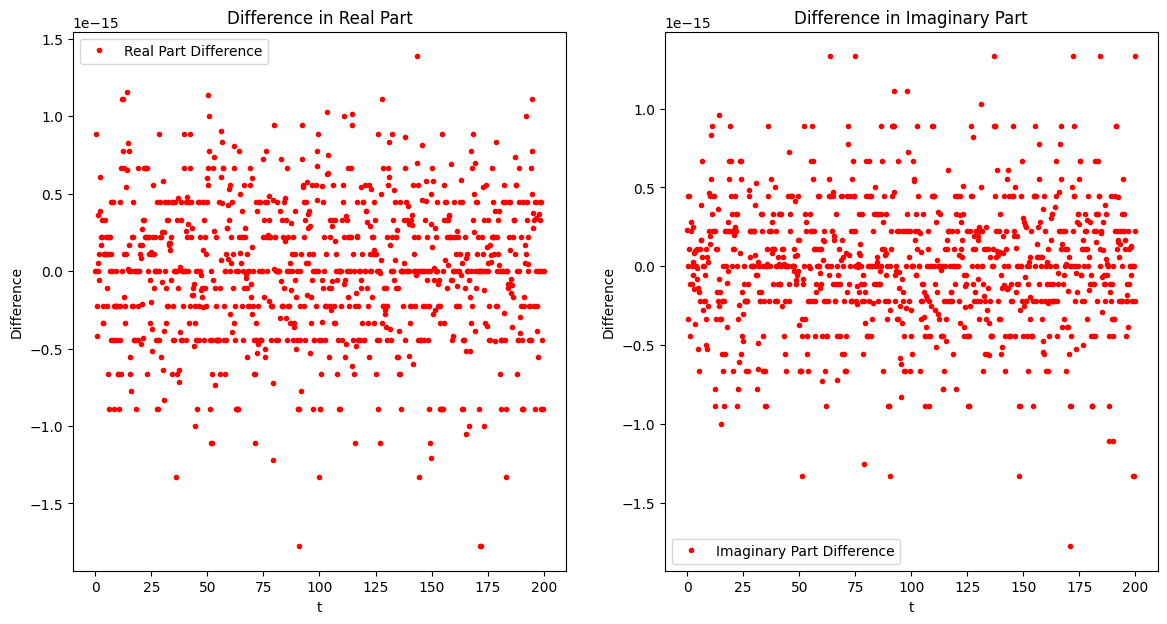

In [13]:
import matplotlib.pyplot as plt

# Difference between true and predicted values
real_diff = true_real - pred_real
imag_diff = true_imag - pred_imag

# Plot the differences
plt.figure(figsize=(14, 7))

# Plot real part difference
plt.subplot(1, 2, 1)
plt.plot(t_values, real_diff, 'r.', label='Real Part Difference')
plt.legend()
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference in Real Part')

# Plot imaginary part difference
plt.subplot(1, 2, 2)
plt.plot(t_values, imag_diff, 'r.', label='Imaginary Part Difference')
plt.legend()
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Difference in Imaginary Part')

plt.show()


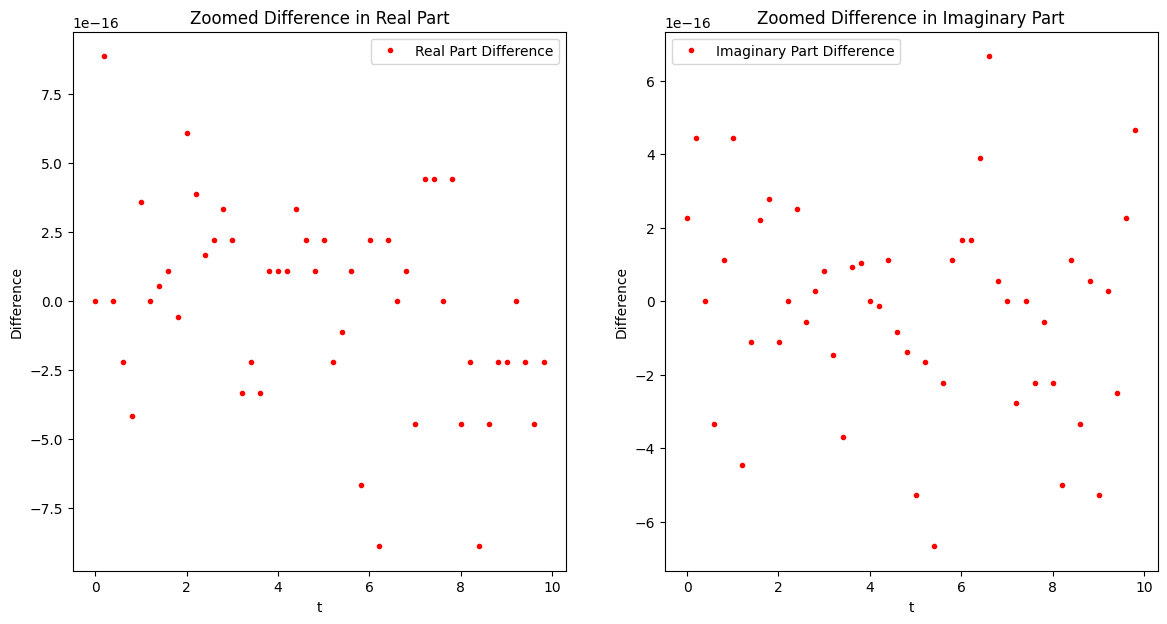

In [15]:
# Zoom in on the first 50 data points
zoom_range = 50

# Plot the differences
plt.figure(figsize=(14, 7))

# Plot real part difference (zoomed)
plt.subplot(1, 2, 1)
plt.plot(t_values[:zoom_range], real_diff[:zoom_range], 'r.', label='Real Part Difference')
plt.legend()
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Zoomed Difference in Real Part')

# Plot imaginary part difference (zoomed)
plt.subplot(1, 2, 2)
plt.plot(t_values[:zoom_range], imag_diff[:zoom_range], 'r.', label='Imaginary Part Difference')
plt.legend()
plt.xlabel('t')
plt.ylabel('Difference')
plt.title('Zoomed Difference in Imaginary Part')

plt.show()


In [16]:
# Zero out high-frequency components
threshold = 50  # Example threshold for zeroing out high-frequency components
real_fft_filtered = np.copy(real_fft)
imag_fft_filtered = np.copy(imag_fft)

real_fft_filtered[threshold:-threshold] = 0
imag_fft_filtered[threshold:-threshold] = 0

# Predict values using the filtered FFT
real_pred_filtered = ifft(real_fft_filtered).real
imag_pred_filtered = ifft(imag_fft_filtered).real

# Calculate new errors
mse_real_filtered = mean_squared_error(true_real, real_pred_filtered)
mae_real_filtered = mean_absolute_error(true_real, real_pred_filtered)
mse_imag_filtered = mean_squared_error(true_imag, imag_pred_filtered)
mae_imag_filtered = mean_absolute_error(true_imag, imag_pred_filtered)

print(f'Filtered Real Part - MSE: {mse_real_filtered}, MAE: {mae_real_filtered}')
print(f'Filtered Imaginary Part - MSE: {mse_imag_filtered}, MAE: {mae_imag_filtered}')


Filtered Real Part - MSE: 0.8492756807517382, MAE: 0.6922644147317671
Filtered Imaginary Part - MSE: 0.8018235731242777, MAE: 0.6836230145014085


Epoch 1/100


/Users/rafaelaguilherdacosta/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1204 - mae: 0.3108 - val_loss: 0.1072 - val_mae: 0.2931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0280 - mae: 0.1399 - val_loss: 0.0359 - val_mae: 0.1513
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0175 - mae: 0.1084 - val_loss: 0.0265 - val_mae: 0.1258
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0161 - mae: 0.0975 - val_loss: 0.0266 - val_mae: 0.1252
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148 - mae: 0.0926 - val_loss: 0.0277 - val_mae: 0.1277
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0141 - mae: 0.0883 - val_loss: 0.0269 - val_mae: 0.1259
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mae: 0.0914 - val_loss: 0.0272 - val_mae: 0.1264
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - mae: 0.0946 - val_loss: 0.0265 - val_mae: 0.1250
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - mae: 0.0

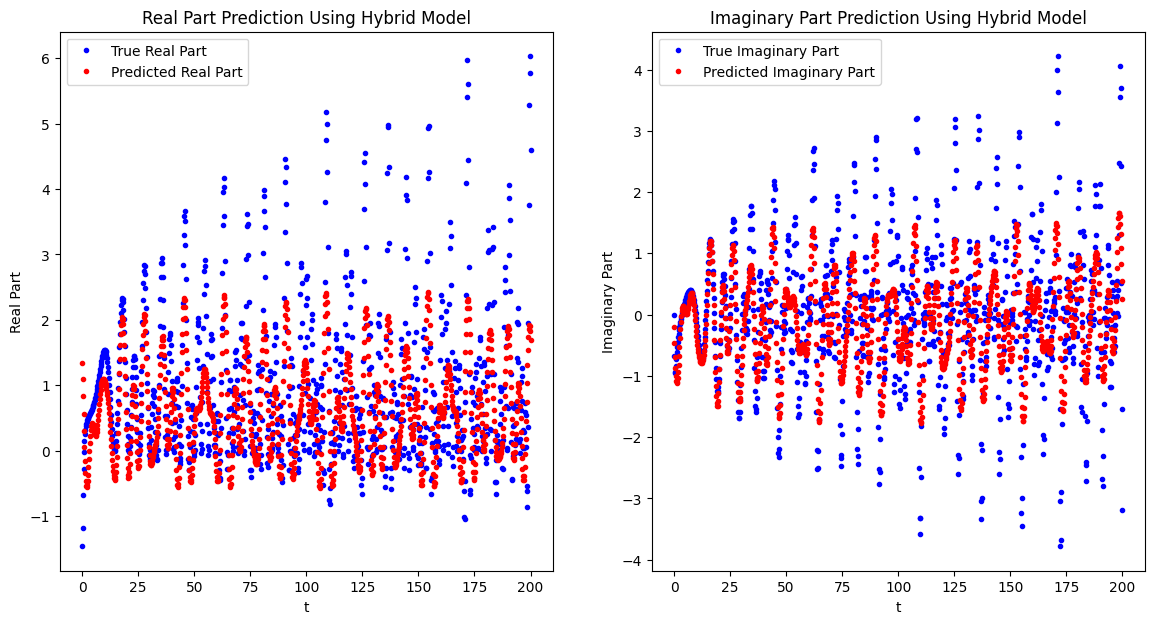

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mpmath import zeta, j
from scipy.fft import fft, ifft

# Generate data points
def generate_zeta_data(num_points):
    t_values = np.linspace(0, 200, num_points)
    zeta_values = [zeta(0.5 + t * j) for t in t_values]
    real_parts = [float(z.real) for z in zeta_values]
    imag_parts = [float(z.imag) for z in zeta_values]
    return t_values, np.array(real_parts), np.array(imag_parts)

# Generate data
t_values, real_parts, imag_parts = generate_zeta_data(1000)

# Apply Fourier Transform
real_fft = fft(real_parts)
imag_fft = fft(imag_parts)

# Zero out high-frequency components
threshold = 50  # Example threshold for zeroing out high-frequency components
real_fft_filtered = np.copy(real_fft)
imag_fft_filtered = np.copy(imag_fft)

real_fft_filtered[threshold:-threshold] = 0
imag_fft_filtered[threshold:-threshold] = 0

# Predict values using the filtered FFT
real_pred_filtered = ifft(real_fft_filtered).real
imag_pred_filtered = ifft(imag_fft_filtered).real

# Calculate residuals
real_residuals = real_parts - real_pred_filtered
imag_residuals = imag_parts - imag_pred_filtered

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = t_values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
real_residuals_scaled = scaler_y.fit_transform(real_residuals.reshape(-1, 1))
imag_residuals_scaled = scaler_y.fit_transform(imag_residuals.reshape(-1, 1))

# Define the neural network for residuals
def build_nn_model():
    model = Sequential([
        Dense(64, input_dim=1, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for residuals
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the neural network on real residuals
nn_real = build_nn_model()
history_real = nn_real.fit(X_scaled, real_residuals_scaled, epochs=100, batch_size=32, validation_split=0.2)

# Train the neural network on imaginary residuals
nn_imag = build_nn_model()
history_imag = nn_imag.fit(X_scaled, imag_residuals_scaled, epochs=100, batch_size=32, validation_split=0.2)

# Predict residuals
real_residuals_pred_scaled = nn_real.predict(X_scaled)
imag_residuals_pred_scaled = nn_imag.predict(X_scaled)

# Inverse transform the residuals
real_residuals_pred = scaler_y.inverse_transform(real_residuals_pred_scaled)
imag_residuals_pred = scaler_y.inverse_transform(imag_residuals_pred_scaled)

# Combine predictions
final_real_pred = real_pred_filtered + real_residuals_pred.flatten()
final_imag_pred = imag_pred_filtered + imag_residuals_pred.flatten()

# Calculate new errors
mse_real_final = mean_squared_error(real_parts, final_real_pred)
mae_real_final = mean_absolute_error(real_parts, final_real_pred)
mse_imag_final = mean_squared_error(imag_parts, final_imag_pred)
mae_imag_final = mean_absolute_error(imag_parts, final_imag_pred)

print(f'Final Real Part - MSE: {mse_real_final}, MAE: {mae_real_final}')
print(f'Final Imaginary Part - MSE: {mse_imag_final}, MAE: {mae_imag_final}')

# Plot final predictions
plt.figure(figsize=(14, 7))

# Plot real part predictions
plt.subplot(1, 2, 1)
plt.plot(t_values, real_parts, 'b.', label='True Real Part')
plt.plot(t_values, final_real_pred, 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part Prediction Using Hybrid Model')

# Plot imaginary part predictions
plt.subplot(1, 2, 2)
plt.plot(t_values, imag_parts, 'b.', label='True Imaginary Part')
plt.plot(t_values, final_imag_pred, 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part Prediction Using Hybrid Model')

plt.show()


Epoch 1/100


/Users/rafaelaguilherdacosta/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1547 - mae: 0.3635 - val_loss: 0.1627 - val_mae: 0.3780
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - mae: 0.1404 - val_loss: 0.0312 - val_mae: 0.1444
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0166 - mae: 0.1054 - val_loss: 0.0199 - val_mae: 0.1119
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - mae: 0.0860 - val_loss: 0.0192 - val_mae: 0.1096
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - mae: 0.0879 - val_loss: 0.0192 - val_mae: 0.1097
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0147 - mae: 0.0940 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - mae: 0.0887 - val_loss: 0.0205 - val_mae: 0.1140
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0139 - mae: 0.0907 - val_loss: 0.0209 - val_mae: 0.1154
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132 - mae: 0.0

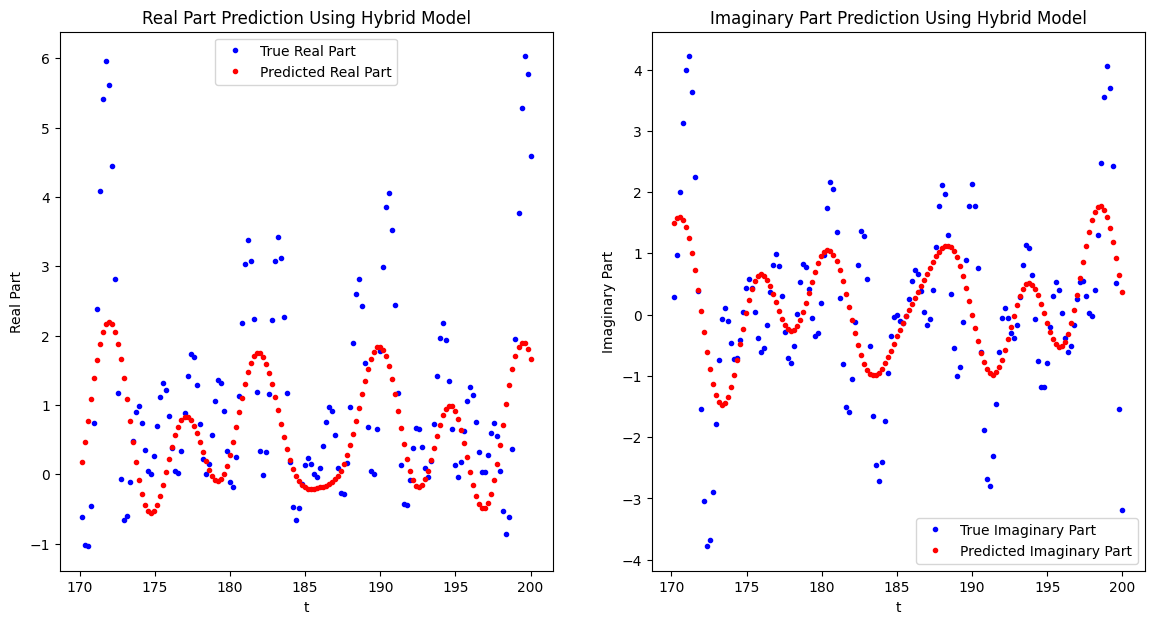

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mpmath import zeta, j
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Generate data points
def generate_zeta_data(num_points):
    t_values = np.linspace(0, 200, num_points)
    zeta_values = [zeta(0.5 + t * j) for t in t_values]
    real_parts = [float(z.real) for z in zeta_values]
    imag_parts = [float(z.imag) for z in zeta_values]
    return t_values, np.array(real_parts), np.array(imag_parts)

# Generate data
num_points = 1000
t_values, real_parts, imag_parts = generate_zeta_data(num_points)

# Apply Fourier Transform
real_fft = fft(real_parts)
imag_fft = fft(imag_parts)

# Zero out high-frequency components
threshold = 50  # Example threshold for zeroing out high-frequency components
real_fft_filtered = np.copy(real_fft)
imag_fft_filtered = np.copy(imag_fft)

real_fft_filtered[threshold:-threshold] = 0
imag_fft_filtered[threshold:-threshold] = 0

# Predict values using the filtered FFT
real_pred_filtered = ifft(real_fft_filtered).real
imag_pred_filtered = ifft(imag_fft_filtered).real

# Calculate residuals
real_residuals = real_parts - real_pred_filtered
imag_residuals = imag_parts - imag_pred_filtered

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = t_values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
real_residuals_scaled = scaler_y.fit_transform(real_residuals.reshape(-1, 1))
imag_residuals_scaled = scaler_y.fit_transform(imag_residuals.reshape(-1, 1))

# Split data into training, validation, and test sets with continuous segments
train_size = int(0.7 * num_points)
val_size = int(0.15 * num_points)
test_size = num_points - train_size - val_size

X_train, X_val, X_test = X_scaled[:train_size], X_scaled[train_size:train_size+val_size], X_scaled[train_size+val_size:]
real_res_train, real_res_val, real_res_test = real_residuals_scaled[:train_size], real_residuals_scaled[train_size:train_size+val_size], real_residuals_scaled[train_size+val_size:]
imag_res_train, imag_res_val, imag_res_test = imag_residuals_scaled[:train_size], imag_residuals_scaled[train_size:train_size+val_size], imag_residuals_scaled[train_size+val_size:]

# Define the neural network for residuals
def build_nn_model():
    model = Sequential([
        Dense(64, input_dim=1, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)  # Output layer for residuals
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the neural network on real residuals
nn_real = build_nn_model()
history_real = nn_real.fit(X_train, real_res_train, epochs=100, batch_size=32, validation_data=(X_val, real_res_val))

# Train the neural network on imaginary residuals
nn_imag = build_nn_model()
history_imag = nn_imag.fit(X_train, imag_res_train, epochs=100, batch_size=32, validation_data=(X_val, imag_res_val))

# Predict residuals
real_residuals_pred_scaled = nn_real.predict(X_test)
imag_residuals_pred_scaled = nn_imag.predict(X_test)

# Inverse transform the residuals
real_residuals_pred = scaler_y.inverse_transform(real_residuals_pred_scaled)
imag_residuals_pred = scaler_y.inverse_transform(imag_residuals_pred_scaled)

# Combine predictions with the corresponding segments of the ifft results
final_real_pred = ifft(real_fft_filtered).real[train_size+val_size:] + real_residuals_pred.flatten()
final_imag_pred = ifft(imag_fft_filtered).real[train_size+val_size:] + imag_residuals_pred.flatten()

# Calculate new errors
mse_real_final = mean_squared_error(real_parts[train_size+val_size:], final_real_pred)
mae_real_final = mean_absolute_error(real_parts[train_size+val_size:], final_real_pred)
mse_imag_final = mean_squared_error(imag_parts[train_size+val_size:], final_imag_pred)
mae_imag_final = mean_absolute_error(imag_parts[train_size+val_size:], final_imag_pred)

print(f'Final Real Part - MSE: {mse_real_final}, MAE: {mae_real_final}')
print(f'Final Imaginary Part - MSE: {mse_imag_final}, MAE: {mae_imag_final}')

# Plot final predictions
plt.figure(figsize=(14, 7))

# Plot real part predictions
plt.subplot(1, 2, 1)
plt.plot(t_values[train_size+val_size:], real_parts[train_size+val_size:], 'b.', label='True Real Part')
plt.plot(t_values[train_size+val_size:], final_real_pred, 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part Prediction Using Hybrid Model')

# Plot imaginary part predictions
plt.subplot(1, 2, 2)
plt.plot(t_values[train_size+val_size:], imag_parts[train_size+val_size:], 'b.', label='True Imaginary Part')
plt.plot(t_values[train_size+val_size:], final_imag_pred, 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part Prediction Using Hybrid Model')

plt.show()


Epoch 1/200


/Users/rafaelaguilherdacosta/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0203 - val_mae: 0.1097
Epoch 2/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - mae: 0.1055 - val_loss: 0.0206 - val_mae: 0.1088
Epoch 3/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176 - mae: 0.1025 - val_loss: 0.0216 - val_mae: 0.1182
Epoch 4/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - mae: 0.0998 - val_loss: 0.0208 - val_mae: 0.1145
Epoch 5/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - mae: 0.1030 - val_loss: 0.0214 - val_mae: 0.1174
Epoch 6/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - mae: 0.0995 - val_loss: 0.0207 - val_mae: 0.1137
Epoch 7/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - mae: 0.1027 - val_loss: 0.0203 - val_mae: 0.1096
Epoch 8/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - mae: 0.1008 - val_loss: 0.0207 - val_mae: 0.1142
Epoch 9/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

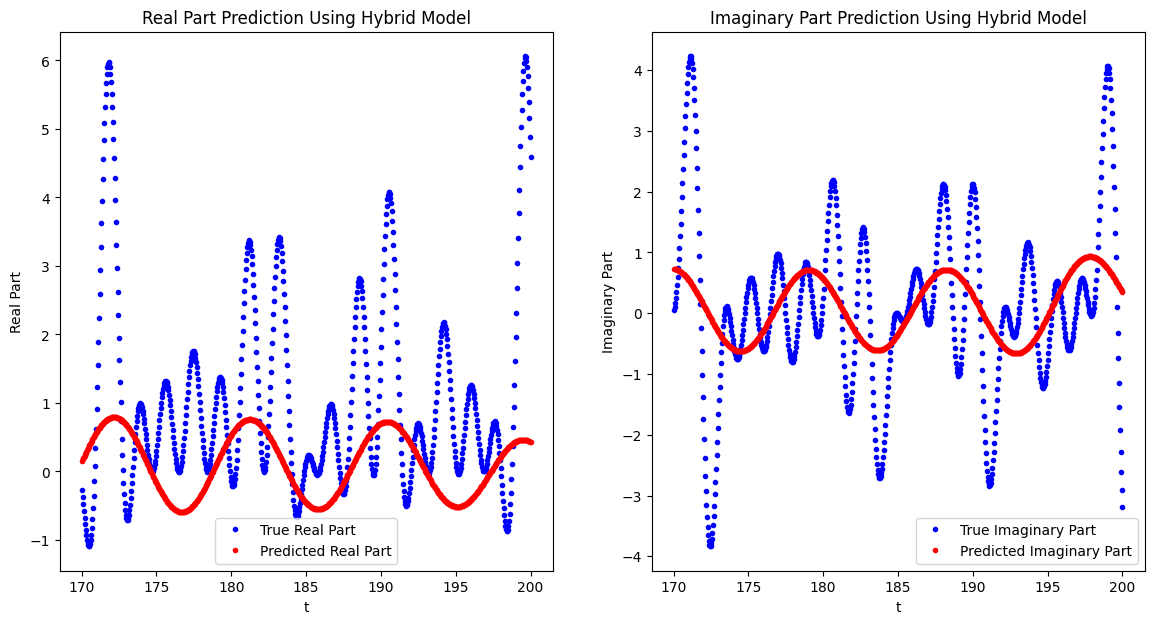

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mpmath import zeta, j
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Generate data points
def generate_zeta_data(num_points):
    t_values = np.linspace(0, 200, num_points)
    zeta_values = [zeta(0.5 + t * j) for t in t_values]
    real_parts = [float(z.real) for z in zeta_values]
    imag_parts = [float(z.imag) for z in zeta_values]
    return t_values, np.array(real_parts), np.array(imag_parts)

# Generate data
num_points = 5000
t_values, real_parts, imag_parts = generate_zeta_data(num_points)

# Apply Fourier Transform
real_fft = fft(real_parts)
imag_fft = fft(imag_parts)

# Zero out high-frequency components
threshold = 25  # Adjusted threshold for zeroing out high-frequency components
real_fft_filtered = np.copy(real_fft)
imag_fft_filtered = np.copy(imag_fft)

real_fft_filtered[threshold:-threshold] = 0
imag_fft_filtered[threshold:-threshold] = 0

# Predict values using the filtered FFT
real_pred_filtered = ifft(real_fft_filtered).real
imag_pred_filtered = ifft(imag_fft_filtered).real

# Calculate residuals
real_residuals = real_parts - real_pred_filtered
imag_residuals = imag_parts - imag_pred_filtered

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = t_values.reshape(-1, 1)
X_scaled = scaler_X.fit_transform(X)
real_residuals_scaled = scaler_y.fit_transform(real_residuals.reshape(-1, 1))
imag_residuals_scaled = scaler_y.fit_transform(imag_residuals.reshape(-1, 1))

# Split data into training, validation, and test sets with continuous segments
train_size = int(0.7 * num_points)
val_size = int(0.15 * num_points)
test_size = num_points - train_size - val_size

X_train, X_val, X_test = X_scaled[:train_size], X_scaled[train_size:train_size+val_size], X_scaled[train_size+val_size:]
real_res_train, real_res_val, real_res_test = real_residuals_scaled[:train_size], real_residuals_scaled[train_size:train_size+val_size], real_residuals_scaled[train_size+val_size:]
imag_res_train, imag_res_val, imag_res_test = imag_residuals_scaled[:train_size], imag_residuals_scaled[train_size:train_size+val_size], imag_residuals_scaled[train_size+val_size:]

# Define the neural network for residuals
def build_nn_model():
    model = Sequential([
        Dense(128, input_dim=1, activation='tanh'),
        Dense(256, activation='tanh'),
        Dense(256, activation='tanh'),
        Dense(1)  # Output layer for residuals
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the neural network on real residuals
nn_real = build_nn_model()
history_real = nn_real.fit(X_train, real_res_train, epochs=200, batch_size=32, validation_data=(X_val, real_res_val))

# Train the neural network on imaginary residuals
nn_imag = build_nn_model()
history_imag = nn_imag.fit(X_train, imag_res_train, epochs=200, batch_size=32, validation_data=(X_val, imag_res_val))

# Predict residuals
real_residuals_pred_scaled = nn_real.predict(X_test)
imag_residuals_pred_scaled = nn_imag.predict(X_test)

# Inverse transform the residuals
real_residuals_pred = scaler_y.inverse_transform(real_residuals_pred_scaled)
imag_residuals_pred = scaler_y.inverse_transform(imag_residuals_pred_scaled)

# Combine predictions with the corresponding segments of the ifft results
final_real_pred = ifft(real_fft_filtered).real[train_size+val_size:] + real_residuals_pred.flatten()
final_imag_pred = ifft(imag_fft_filtered).real[train_size+val_size:] + imag_residuals_pred.flatten()

# Calculate new errors
mse_real_final = mean_squared_error(real_parts[train_size+val_size:], final_real_pred)
mae_real_final = mean_absolute_error(real_parts[train_size+val_size:], final_real_pred)
mse_imag_final = mean_squared_error(imag_parts[train_size+val_size:], final_imag_pred)
mae_imag_final = mean_absolute_error(imag_parts[train_size+val_size:], final_imag_pred)

print(f'Final Real Part - MSE: {mse_real_final}, MAE: {mae_real_final}')
print(f'Final Imaginary Part - MSE: {mse_imag_final}, MAE: {mae_imag_final}')

# Plot final predictions
plt.figure(figsize=(14, 7))

# Plot real part predictions
plt.subplot(1, 2, 1)
plt.plot(t_values[train_size+val_size:], real_parts[train_size+val_size:], 'b.', label='True Real Part')
plt.plot(t_values[train_size+val_size:], final_real_pred, 'r.', label='Predicted Real Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Real Part')
plt.title('Real Part Prediction Using Hybrid Model')

# Plot imaginary part predictions
plt.subplot(1, 2, 2)
plt.plot(t_values[train_size+val_size:], imag_parts[train_size+val_size:], 'b.', label='True Imaginary Part')
plt.plot(t_values[train_size+val_size:], final_imag_pred, 'r.', label='Predicted Imaginary Part')
plt.legend()
plt.xlabel('t')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Part Prediction Using Hybrid Model')

plt.show()
